In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all datasets
df_clean = pd.read_csv("/content/covid_19_clean_complete.csv")
df_country = pd.read_csv("/content/country_wise_latest.csv")
df_daywise = pd.read_csv("/content/day_wise.csv")
df_grouped = pd.read_csv("/content/full_grouped.csv")
df_usa = pd.read_csv("/content/usa_county_wise.csv")
df_worldometer = pd.read_csv("/content/worldometer_data.csv")

# Convert 'Date' to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


# Viewing and Inspecting Data
print("Dataset Info:")
print(df_clean.info())
print("\nBasic Statistics:")
print(df_clean.describe())
print("\nFirst Few Rows:")
print(df_clean.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB
None

Basic Statistics:
                Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean

In [63]:
# Check for missing values
print("\nMissing Values:")
print(df_clean.isnull().sum() / len(df_clean) * 100)

df_clean.fillna({'Province/State': 'Unknown'}, inplace=True)


# Fill missing values in numerical columns with 0
df_clean.fillna(0, inplace=True)


# Fill NaN values with 0 (or use other methods as needed)
df_clean.fillna(0, inplace=True)

# Selecting and Filtering Data
selected_columns = df_clean[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
filtered_data = df_clean[(df_clean['Confirmed'] > 10000) & (df_clean['Deaths'] > 100)]



Missing Values:
Province/State    70.114943
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO Region         0.000000
dtype: float64


In [64]:
# Modifying Data
df_clean.rename(columns={'Country/Region': 'Country'}, inplace=True)  # Rename column
df_clean['Active Cases'] = df_clean['Confirmed'] - df_clean['Deaths'] - df_clean['Recovered']  # New column

In [65]:
# Grouping and Aggregation
country_summary = df_clean.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum()
country_summary['Death Rate'] = country_summary['Deaths'] / country_summary['Confirmed']
country_summary['Recovery Rate'] = country_summary['Recovered'] / country_summary['Confirmed']
print("\nCountry Summary:")
print(country_summary.head())


Country Summary:
             Confirmed  Deaths  Recovered  Death Rate  Recovery Rate
Country                                                             
Afghanistan    1936390   49098     798240    0.025355       0.412231
Albania         196702    5708     118877    0.029019       0.604351
Algeria        1179755   77972     755897    0.066092       0.640724
Andorra          94404    5423      69074    0.057445       0.731685
Angola           22662    1078       6573    0.047569       0.290045


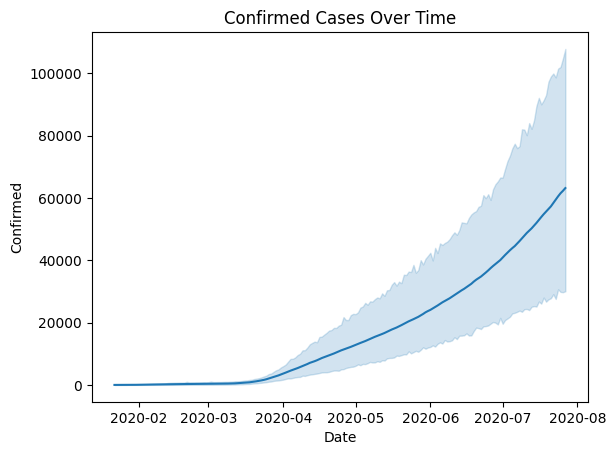

In [66]:
# Visualization
sns.lineplot(x='Date', y='Confirmed', data=df_clean)
plt.title('Confirmed Cases Over Time')
plt.show()

In [67]:
print(df_clean.head())

  Province/State      Country       Lat       Long       Date  Confirmed  \
0        Unknown  Afghanistan  33.93911  67.709953 2020-01-22          0   
1        Unknown      Albania  41.15330  20.168300 2020-01-22          0   
2        Unknown      Algeria  28.03390   1.659600 2020-01-22          0   
3        Unknown      Andorra  42.50630   1.521800 2020-01-22          0   
4        Unknown       Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  Active Cases  
0       0          0       0  Eastern Mediterranean             0  
1       0          0       0                 Europe             0  
2       0          0       0                 Africa             0  
3       0          0       0                 Europe             0  
4       0          0       0                 Africa             0  


In [68]:
# Save the cleaned DataFrame to a new CSV file
df_clean_complete.to_csv("/content/Covid_19_clean_complete_preprocessed.csv", index=False)
print("Preprocessed data saved to Covid_19_clean_complete_preprocessed.csv")

Preprocessed data saved to Covid_19_clean_complete_preprocessed.csv
